# Dicision Tree Regressor Model

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

Problem statement in this data :- we have one independent variable 'Tempreture' and on dependent variable 'Revenue'.You have to 
build a decision tree regressor to study the relationship between two variable of the ice cream shop,and then predict the 
revenue for the ice cream shop based on particular temperature on that day.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Temperature v/s Revenue')

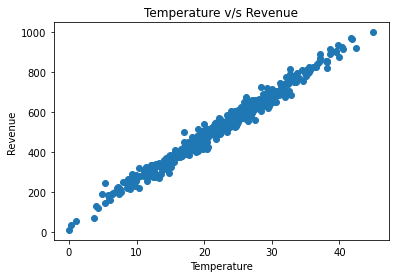

In [7]:
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

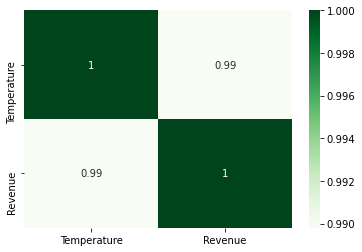

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

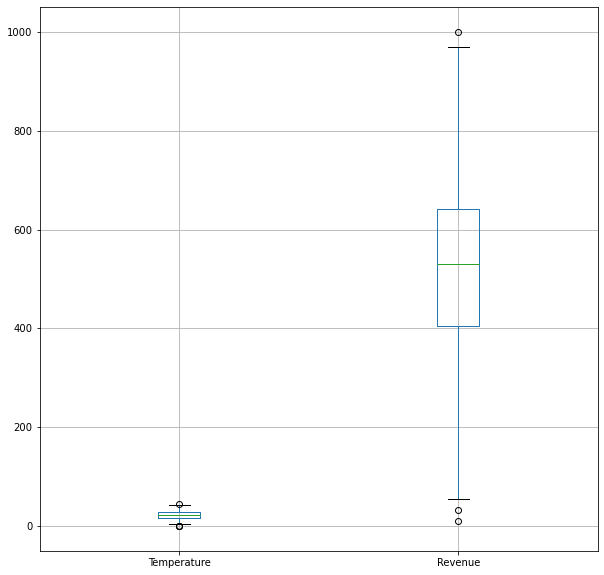

In [9]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

Splitting the data-Training & test

In [10]:
x=np.array(df.Temperature.values)
y=np.array(df.Revenue.values)

In [11]:
from sklearn.preprocessing import StandardScaler
stanscale = StandardScaler()
x=stanscale.fit_transform(x.reshape(-1, 1))
y=stanscale.fit_transform(y.reshape(-1, 1))

In [12]:
x

array([[ 2.88646938e-01],
       [ 4.66472813e-01],
       [ 6.87207155e-01],
       [-2.02377839e-01],
       [-1.32645236e+00],
       [-9.74212604e-01],
       [-1.05392466e+00],
       [ 1.06348347e+00],
       [-2.62791798e+00],
       [ 1.16677850e+00],
       [-1.33241706e+00],
       [-2.29561034e+00],
       [-4.22883244e-01],
       [-1.06421991e+00],
       [ 2.13984539e+00],
       [-4.63520159e-01],
       [ 4.57841071e-01],
       [ 2.50770714e+00],
       [ 9.09618484e-01],
       [-5.64120830e-02],
       [ 3.98800292e-01],
       [-8.67631874e-01],
       [ 4.78581709e-02],
       [-7.38537629e-01],
       [ 2.03936834e-01],
       [-4.02300861e-01],
       [-8.12379770e-01],
       [ 8.59615819e-01],
       [-3.96575215e-01],
       [ 1.59340614e+00],
       [ 2.41301047e-01],
       [-8.65576964e-01],
       [-1.66181939e+00],
       [-4.94418314e-01],
       [ 1.65630865e+00],
       [ 1.83293659e+00],
       [ 6.46925683e-03],
       [-5.82960408e-01],
       [ 1.1

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
regressor = DecisionTreeRegressor()

In [16]:
# Train our model
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
ypred=regressor.predict(x_test)

In [18]:
ypred

array([ 0.7819639 , -1.72497896,  0.41793303, -1.13329704, -0.17314559,
        0.35104681,  1.64413911,  0.07549111,  1.7469346 ,  0.7819639 ,
        1.75042286, -0.40016144,  0.73137498, -0.14586309,  0.68170472,
       -0.14585954,  1.29999054,  0.538471  ,  1.99279015,  0.21152949,
       -0.9156669 , -0.8019631 ,  1.75042286, -1.38583486, -1.59254752,
        0.00886707, -2.79076772, -0.25267312,  0.68170472,  2.55505763,
       -0.78109879, -0.48119124,  0.2908548 ,  1.8756925 ,  0.88032182,
        1.64413911, -0.40016144,  0.76085569, -1.06795554,  0.88019761,
       -0.45689883, -0.27394206,  1.8756925 , -0.27975599, -0.78533995,
       -0.38453344,  0.7819639 ,  1.33680656,  0.00886707,  0.92785685,
        0.60681113,  1.7469346 , -0.07801491, -1.38583486, -0.4179941 ,
       -0.40574029, -0.10549898, -0.71126894, -1.50940546, -0.00628015,
        0.27967418, -0.27975599,  0.74354455, -1.76328451,  0.73969077,
       -0.14585954,  0.92435479,  0.17832966,  0.23860659, -0.16

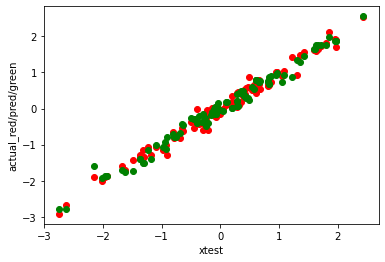

In [19]:
plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,ypred, color='green')
plt.xlabel('xtest')
plt.ylabel('actual_red/pred/green')
plt.show()

In [20]:
# Perfromance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [21]:
r2_score(y_test,ypred)

0.9645808464437261